In [1]:
import os
import urllib.request

## red wine
data_location = '../data/wine-quality/winequality-red.csv'
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/wine-quality/winequality-red.csv'

## white wine
# data_location= '../data/wine-quality/winequality-white.csv'
# data_location =  'https://elephantscale-public.s3.amazonaws.com/data/wine-quality/winequality-white.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)
import pandas as pd

dataset = pd.read_csv(data_location, sep=";")
dataset = dataset.dropna()
dataset.sample(10)

data_location: winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
869,7.6,0.630,0.03,2.0,0.080,27.0,43.0,0.99578,3.44,0.64,10.9,6
1084,7.2,0.380,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5,6
622,10.0,0.580,0.22,1.9,0.080,9.0,32.0,0.99740,3.13,0.55,9.5,5
60,8.8,0.400,0.40,2.2,0.079,19.0,52.0,0.99800,3.44,0.64,9.2,5
232,8.5,0.370,0.20,2.8,0.090,18.0,58.0,0.99800,3.34,0.70,9.6,6
104,7.2,0.490,0.24,2.2,0.070,5.0,36.0,0.99600,3.33,0.48,9.4,5
59,7.3,0.390,0.31,2.4,0.074,9.0,46.0,0.99620,3.41,0.54,9.4,6
776,6.9,0.765,0.18,2.4,0.243,5.5,48.0,0.99612,3.40,0.60,10.3,6
634,7.9,0.350,0.21,1.9,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
1237,7.1,0.750,0.01,2.2,0.059,11.0,18.0,0.99242,3.39,0.40,12.8,6


In [2]:
column_to_remove = 'quality'

dataset2 = dataset.drop(column_to_remove, axis=1)

print("original data columns  ", len(dataset.columns))

features = list(dataset2)
print("features: " + str(features))
dataset2
## basic data analytics
dataset2.describe().T

original data columns   12
features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [3]:
feature_vector=dataset2

In [4]:
dataset2.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


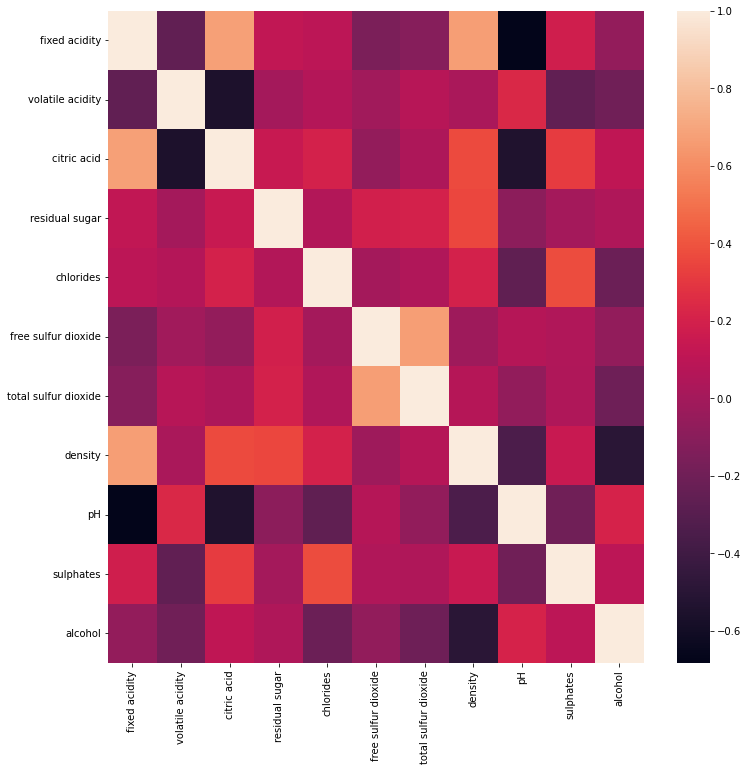

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
sns.heatmap(dataset2.corr())
plt.show()

In [6]:
#We need to scale data before PCA
feature_vector = (feature_vector - feature_vector.mean()) / feature_vector.std()
feature_vector

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243


In [7]:
# number of principal components 

## TODO with 5 PC 
num_pc = 5

from sklearn.decomposition import PCA

pca = PCA(n_components = num_pc)
pca.fit(feature_vector)
transformed_v = pca.transform(feature_vector)
transformed_v_df = pd.DataFrame(transformed_v, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
transformed_v_df

,PC1,PC2,PC3,PC4,PC5
0,-1.619023,0.450809,-1.773899,0.043727,0.066994
1,-0.798920,1.855972,-0.911405,0.547895,-0.018386
2,-0.748245,0.881763,-1.171028,0.410892,-0.043517
3,2.356935,-0.269892,0.243413,-0.928160,-1.498680
4,-1.619023,0.450809,-1.773899,0.043727,0.066994
...,...,...,...,...,...
1594,-2.149828,0.814031,0.616870,0.407559,-0.240861
1595,-2.213804,0.892822,1.806837,0.413874,0.119555
1596,-1.455674,0.311648,1.123888,0.491723,0.193655
1597,-2.269808,0.979485,0.627768,0.639570,0.067714


In [8]:
transformed_v_df.corr().round(3)

,PC1,PC2,PC3,PC4,PC5
PC1,1.0,-0.0,-0.0,0.0,0.0
PC2,-0.0,1.0,-0.0,-0.0,-0.0
PC3,-0.0,-0.0,1.0,0.0,0.0
PC4,0.0,-0.0,0.0,1.0,-0.0
PC5,0.0,-0.0,0.0,-0.0,1.0


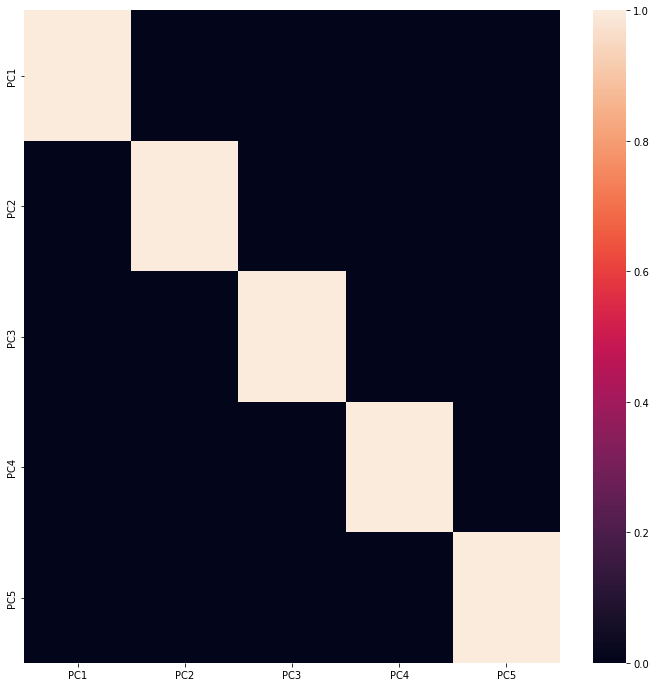

In [9]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(transformed_v_df.corr())
plt.show()

In [10]:
import numpy as np

## variance
variance = pca.explained_variance_ratio_
print(variance)
print ("Original data had {} features,  principal components {}".format(len(dataset2.columns), num_pc))
print("Cumulative Explained Variance: " + str(np.cumsum(variance)[-1]))

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837]
Original data had 11 features,  principal components 5
Cumulative Explained Variance: 0.7952827473610354


top components of PC1:
Feature Names: ['fixed acidity', 'citric acid', 'pH']
Percentages: [0.1747774  0.16560389 0.15663416]

top components of PC2:
Feature Names: ['total sulfur dioxide', 'free sulfur dioxide', 'alcohol']
Percentages: [0.2105755  0.18989827 0.14279563]

top components of PC3:
Feature Names: ['alcohol', 'volatile acidity', 'free sulfur dioxide']
Percentages: [0.16238591 0.15491143 0.14762322]

top components of PC4:
Feature Names: ['chlorides', 'sulphates', 'residual sugar']
Percentages: [0.28271254 0.23377327 0.15820169]

top components of PC5:
Feature Names: ['residual sugar', 'alcohol', 'pH']
Percentages: [0.26902899 0.12885912 0.09830475]



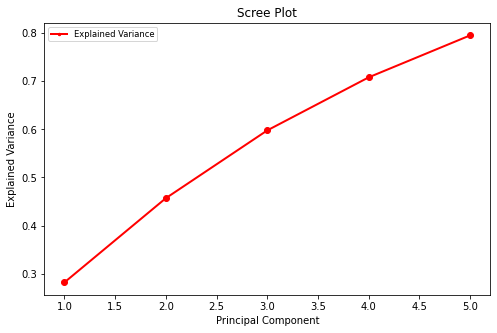

In [11]:
#Screeplot goes from 0.0 to 1.0

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_pc) + 1
plt.plot(np.arange(num_pc) + 1, np.cumsum(variance), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')


leg = plt.legend(['Explained Variance'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
for x in range(0,5):
    # Let's get the top components of PC1:
    print("top components of PC" + str(x+1) + ":")
    rel_values = np.abs(pca.components_[x])/np.sum(np.abs(pca.components_[x]))
    print("Feature Names: " + str([features[i] for i in np.argsort(-rel_values)[:3]]))
    print("Percentages: " + str(rel_values[np.argsort(-rel_values)[:3]]))
    print()

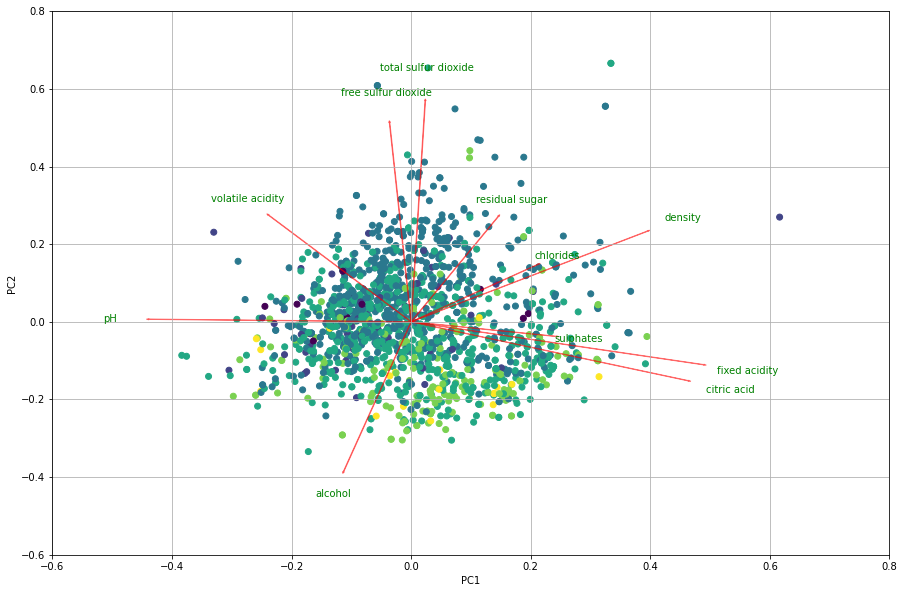

In [12]:
#Biplot
#Let's reduce dimensions down to 2 dimensions, and then we can do our biplot. A biplot plots 2 PCA'ed dimensions, and then also projects the original feature vector onto those two axes. This helps us see and visualize how the principal components are related to the original features.

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def biplot(score,coeff,y,labels=None):
    plt.rcParams['figure.figsize'] = [15, 10]
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.6,0.8)
    plt.ylim(-0.6,0.8)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
from sklearn.decomposition import PCA

pca_2d = PCA(n_components = 2)

x_new = pca_2d.fit_transform(feature_vector)


# Let's do a biplot of a PCA = 2 dimensions
biplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),dataset['quality'],labels=features)